<a href="https://colab.research.google.com/github/matroskinsk/useful_little_things/blob/main/simpsons_baseline_ipynb_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## **Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ**

# Путешествие по Спрингфилду.


Сегодня вам предстоить помочь телекомпании FOX  в обработке их контента. Как вы знаете сериал Симсоны идет на телеэкранах более 25 лет и за это время скопилось очень много видео материала. Персоонажи менялись вместе с изменяющимися графическими технологиями   и Гомер 2018 не очень похож на Гомера 1989. Нашей задачей будет научиться классифицировать персонажей проживающих в Спрингфилде. Думаю, что нет смысла представлять каждого из них в отдельности.



 ![alt text](https://vignette.wikia.nocookie.net/simpsons/images/5/5a/Spider_fat_piglet.png/revision/latest/scale-to-width-down/640?cb=20111118140828)



### Установка зависимостей

In [ ]:
!pip install -U torch torchvision
!pip3 install wheel==0.34.1

  Using cached Pillow-8.2.0-cp39-cp39-win_amd64.whl (2.2 MB)


In [ ]:
# установка подходящей версии torch

from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

c:\users\ikvo\appdata\local\programs\python\python39\lib\site-packages\wheel\pep425tags.py:80: RuntimeWarning: Config variable 'Py_DEBUG' is unset, Python ABI tag may be incorrect
  if get_flag('Py_DEBUG',
ERROR: torch-0.4.1-cp39-cp39-linux_x86_64.whl is not a supported wheel on this platform.


In [ ]:
# we will verify that GPU is enabled for this notebook
# following should print: CUDA is available!  Training on GPU ...
# 
# if it prints otherwise, then you need to enable GPU: 
# from Menu > Runtime > Change Runtime Type > Hardware Accelerator > GPU

import torch
import numpy as np

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is not available.  Training on CPU ...


In [ ]:
# нам необходима версия pillow  5.3.0
# удалим старую версию и установим новую
!pip uninstall -y Pillow
!pip install Pillow==5.3.0
import PIL
print(PIL.PILLOW_VERSION)
# здесь должна быть версия 5.3.0. если это не так перехгрузите данный ноутбук:
# Menu > Runtime > Restart Runtime

Found existing installation: Pillow 8.2.0
Uninstalling Pillow-8.2.0:
  Successfully uninstalled Pillow-8.2.0


  Using cached Pillow-5.3.0.tar.gz (15.6 MB)
  Running setup.py clean for Pillow
Failed to build Pillow
    Running setup.py install for Pillow: started
    Running setup.py install for Pillow: finished with status 'error'
8.2.0


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\ikvo\appdata\local\programs\python\python39\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\IKVO\\AppData\\Local\\Temp\\pip-install-oi4f7yqi\\pillow_2028fa1eb7004a34bde67bd1e7ad5d99\\setup.py'"'"'; __file__='"'"'C:\\Users\\IKVO\\AppData\\Local\\Temp\\pip-install-oi4f7yqi\\pillow_2028fa1eb7004a34bde67bd1e7ad5d99\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\IKVO\AppData\Local\Temp\pip-wheel-8vswebgr'
       cwd: C:\Users\IKVO\AppData\Local\Temp\pip-install-oi4f7yqi\pillow_2028fa1eb7004a34bde67bd1e7ad5d99\
  Complete output (175 lines):
  C:\Users\IKVO\AppData\Local\Temp\pip-install-oi4f7yqi\pillow_2028fa1eb7004a34bde67bd1e7ad5

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
#!unzip -q /content/gdrive/My\ Drive/simpsons/data/dataset.zip -d train
#!unzip -q /content/gdrive/My\ Drive/simpsons/data/testset.zip -d test
!unzip -u '/content/gdrive/MyDrive/journey-springfield.zip' -d '/content/gdrive/MyDrive/journey-springfield'

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: /content/gdrive/MyDrive/journey-springfield/train/simpsons_dataset/moe_szyslak/pic_1025.jpg  
  inflating: /content/gdrive/MyDrive/journey-springfield/train/simpsons_dataset/moe_szyslak/pic_1026.jpg  
  inflating: /content/gdrive/MyDrive/journey-springfield/train/simpsons_dataset/moe_szyslak/pic_1027.jpg  
  inflating: /content/gdrive/MyDrive/journey-springfield/train/simpsons_dataset/moe_szyslak/pic_1028.jpg  
  inflating: /content/gdrive/MyDrive/journey-springfield/train/simpsons_dataset/moe_szyslak/pic_1029.jpg  
  inflating: /content/gdrive/MyDrive/journey-springfield/train/simpsons_dataset/moe_szyslak/pic_1030.jpg  
  inflating: /content/gdrive/MyDrive/journey-springfield/train/simpsons_dataset/moe_szyslak/pic_1031.jpg  
  inflating: /content/gdrive/MyDrive/journey-springfield/train/simpsons_dataset/moe_szyslak/pic_1032.jpg  
  inflating: /content/gdrive/MyDrive/journey-springfield/train/simpsons_data

In [ ]:
!ls /content/gdrive/MyDrive/journey-springfield/train/simpsons_dataset/

abraham_grampa_simpson	  groundskeeper_willie	ned_flanders
agnes_skinner		  homer_simpson		nelson_muntz
apu_nahasapeemapetilon	  kent_brockman		otto_mann
barney_gumble		  krusty_the_clown	patty_bouvier
bart_simpson		  lenny_leonard		principal_skinner
carl_carlson		  lionel_hutz		professor_john_frink
charles_montgomery_burns  lisa_simpson		rainier_wolfcastle
chief_wiggum		  maggie_simpson	ralph_wiggum
cletus_spuckler		  marge_simpson		selma_bouvier
comic_book_guy		  martin_prince		sideshow_bob
disco_stu		  mayor_quimby		sideshow_mel
edna_krabappel		  milhouse_van_houten	snake_jailbird
fat_tony		  miss_hoover		troy_mcclure
gil			  moe_szyslak		waylon_smithers


In [ ]:
!nvidia-smi
import torch
torch.cuda.is_available()

Thu May  6 20:05:41 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    32W /  70W |   8716MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

В нашем тесте будет 990 картнок, для которых вам будет необходимо предсказать класс.

In [ ]:
import pickle
import numpy as np
from skimage import io

from tqdm import tqdm, tqdm_notebook
from PIL import Image
from pathlib import Path

from torchvision import transforms, models
from multiprocessing.pool import ThreadPool
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from matplotlib import colors, pyplot as plt
%matplotlib inline

# в sklearn не все гладко, чтобы в colab удобно выводить картинки 
# мы будем игнорировать warnings
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)


In [ ]:
# разные режимы датасета 
DATA_MODES = ['train', 'val', 'test']
# все изображения будут масштабированы к размеру 224x224 px
RESCALE_SIZE = 224
# работаем на видеокарте
DEVICE = torch.device("cuda")

https://jhui.github.io/2018/02/09/PyTorch-Data-loading-preprocess_torchvision/


Ниже мы исспользуем враппер над датасетом для удобной работы. Вам стоит понимать, что происходит с LabelEncoder и  с torch.Transformation. 

ToTensor конвертирует  PIL Image с параметрами в диапазоне [0, 255] (как все пиксели) в FloatTensor размера (C x H x W) [0,1] , затем производится масштабирование:
$input = \frac{input - \mu}{\text{standard deviation}} $, <br>       константы - средние и дисперсии по каналам на основе ImageNet


Стоит также отметить, что мы переопределяем метод __getitem__ для удобства работы с данной структурой данных.
 Также используется LabelEncoder для преобразования строковых меток классов в id и обратно. В описании датасета указано, что картинки разного размера, так как брались напрямую с видео, поэтому следуем привести их к одному размер (это делает метод  _prepare_sample) 

In [ ]:
class SimpsonsDataset(Dataset):
    """
    Датасет с картинками, который паралельно подгружает их из папок
    производит скалирование и превращение в торчевые тензоры
    """
    def __init__(self, files, mode):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        # режим работы
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)
     
        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        # для преобразования изображений в тензоры PyTorch и нормализации входа
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
        ])
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)
        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y
        
    def _prepare_sample(self, image):
        image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        return np.array(image)

In [ ]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

In [ ]:
TRAIN_DIR = Path('/content/gdrive/MyDrive/journey-springfield/train/simpsons_dataset')
TEST_DIR = Path('/content/gdrive/MyDrive/journey-springfield/testset/testset')

train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))


In [ ]:
from sklearn.model_selection import train_test_split

train_val_labels = [path.parent.name for path in train_val_files]
train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels)

Аргументация

In [ ]:
class SimpsonsDataset_ARG(Dataset):
    """
    Датасет с картинками, который паралельно подгружает их из папок
    производит скалирование и превращение в торчевые тензоры
    """
    def __init__(self, files, mode):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        # режим работы
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)
     
        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        # для преобразования изображений в тензоры PyTorch и нормализации входа
        if self.mode != 'test' and self.mode == 'train':
          transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(30),
                       
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
         ])
        elif self.mode != 'test' and self.mode == 'val':
          transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
          ])
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)
        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y
        
    def _prepare_sample(self, image):
        image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        return np.array(image)

Балансировка Датасета

In [ ]:
def dict_creat(train_files, train_labels):
  '''
  Функция создает словарь имя/путь к файлу
  '''
  dict_s = {}
  for label_i in np.unique(train_labels).tolist():
    dict_s[label_i] = []
  for path_i, label_i in zip(train_files, train_labels):
    dict_s[label_i].append(path_i)
  return dict_s

def print_sod_dict(dct):
  '''
  Выводит содержание словаря
  '''
  for name in dct:
    print(f"{name}\t{len(dct[name])}")
  
def increment_dict(dct, N):
  '''
  Данная функция методом дублирования файлов увеличит объем
  тестовых данных на N(объем которых изначально был меньше N)
  '''
  for name in dct:
    if len(dct[name]) < N:
      dct[name] = dct[name] * (N // len(dct[name]))
      dct[name].extend(dct[name][:100 - len(dct[name])])
  return dct
def train_files_new(dct):
  '''
  создает набор тестовых файлов для датасета
  '''
  tfn  = []
  for name in dct:
    tfn.extend(dct[name])
  return tfn


In [ ]:
train_dataset = SimpsonsDataset(train_files, mode='train')# без аргументации
train_dataset = SimpsonsDataset_ARG(train_files, mode='train')
d_path_sims = dict_creat(train_files, train_dataset.labels)# делаем словарь
print_sod_dict(d_path_sims)

abraham_grampa_simpson	685
agnes_skinner	32
apu_nahasapeemapetilon	467
barney_gumble	80
bart_simpson	1006
carl_carlson	74
charles_montgomery_burns	895
chief_wiggum	739
cletus_spuckler	35
comic_book_guy	352
disco_stu	6
edna_krabappel	343
fat_tony	20
gil	20
groundskeeper_willie	91
homer_simpson	1684
kent_brockman	373
krusty_the_clown	904
lenny_leonard	233
lionel_hutz	2
lisa_simpson	1015
maggie_simpson	96
marge_simpson	968
martin_prince	53
mayor_quimby	185
milhouse_van_houten	809
miss_hoover	13
moe_szyslak	1089
ned_flanders	1090
nelson_muntz	269
otto_mann	24
patty_bouvier	54
principal_skinner	895
professor_john_frink	49
rainier_wolfcastle	34
ralph_wiggum	67
selma_bouvier	77
sideshow_bob	658
sideshow_mel	30
snake_jailbird	41
troy_mcclure	6
waylon_smithers	136


In [ ]:
increment_dict(d_path_sims, 200)
print_sod_dict(d_path_sims)

abraham_grampa_simpson	685
agnes_skinner	292
apu_nahasapeemapetilon	467
barney_gumble	260
bart_simpson	1006
carl_carlson	248
charles_montgomery_burns	895
chief_wiggum	739
cletus_spuckler	275
comic_book_guy	352
disco_stu	298
edna_krabappel	343
fat_tony	300
gil	300
groundskeeper_willie	282
homer_simpson	1684
kent_brockman	373
krusty_the_clown	904
lenny_leonard	233
lionel_hutz	300
lisa_simpson	1015
maggie_simpson	292
marge_simpson	968
martin_prince	259
mayor_quimby	285
milhouse_van_houten	809
miss_hoover	295
moe_szyslak	1089
ned_flanders	1090
nelson_muntz	269
otto_mann	292
patty_bouvier	262
principal_skinner	895
professor_john_frink	296
rainier_wolfcastle	270
ralph_wiggum	234
selma_bouvier	254
sideshow_bob	658
sideshow_mel	280
snake_jailbird	264
troy_mcclure	298
waylon_smithers	236


In [ ]:
n_train_files = train_files_new(d_path_sims)#Новый набор для обучения

print(f'Колличество файлов тестовой выборки до модификации: {len(train_files)}\nКолличество файлов тестовой выборки после модификации: {len(n_train_files)}')


Колличество файлов тестовой выборки до модификации: 15699
Колличество файлов тестовой выборки после модификации: 20846


In [ ]:
from sklearn.model_selection import train_test_split

train_val_labels = [path.parent.name for path in train_val_files]
train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels)

In [ ]:
val_dataset = SimpsonsDataset_ARG(val_files, mode='val')
n_v2_tds = SimpsonsDataset_ARG(n_train_files, mode='train')

In [ ]:
 #uncomment if you have problem with pillow
 def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
 Image.register_extension = register_extension
 def register_extensions(id, extensions): 
     for extension in extensions: register_extension(id, extension)
 Image.register_extensions = register_extensions

Давайте посмотрим на наших героев внутри датасета.

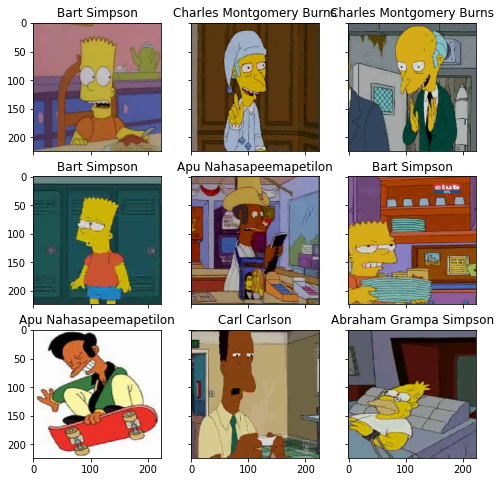

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)

Можете добавить ваши любимые сцены и классифицировать их. (веселые результаты можно кидать в чат)

### Построение нейросети

Запустить данную сеть будет вашим мини-заданием на первую неделю, чтобы было проще участвовать в соревновании.

Данная архитектура будет очень простой и нужна для того, чтобы установить базовое понимание и получить простенький сабмит на Kaggle

<!-- Здесь вам предлагается дописать сверточную сеть глубины 4/5.  -->

*Описание слоев*:



1. размерность входа: 3x224x224 
2.размерности после слоя:  8x111x111
3. 16x54x54
4. 32x26x26
5. 64x12x12
6. выход: 96x5x5


In [ ]:
# Очень простая сеть
class SimpleCnn(nn.Module):
  
    def __init__(self, n_classes):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.out = nn.Linear(96 * 5 * 5, n_classes)
  
  
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)

        x = x.view(x.size(0), -1)
        logits = self.out(x)
        return logits

Добавим парочку сетей

vgg_16

In [ ]:
vgg_16 = models.vgg16(pretrained=True)
vgg_16 = vgg_16.cuda()

ResNet #https://pytorch.org/hub/pytorch_vision_resnet/

In [ ]:
resnet = torch.hub.load('pytorch/vision:v0.9.0', 'resnet18', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0


ResNet_34

In [ ]:
resnet_34 = torch.hub.load('pytorch/vision:v0.9.0', 'resnet34', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0


In [ ]:
resnet_50 = torch.hub.load('pytorch/vision:v0.9.0', 'resnet50', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


Resnet_152

In [ ]:
resnet_152 = torch.hub.load('pytorch/vision:v0.9.0', 'resnet152', pretrained=True)# очень долго раскачивалась, небыло времени обучать

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0


In [ ]:
def fit_epoch(model, train_loader, criterion, optimizer):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)
              
    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    return train_loss, train_acc

In [ ]:
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    for inputs, labels in val_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.double() / processed_size
    return val_loss, val_acc

In [ ]:
def train(train_files, val_files, model, epochs, batch_size):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        # Здесь я развлекался разными оптимизаторами с разными параметрами, AdamW на стандартых параметрах давал лучщий результат на 2 эпохах
        #opt = torch.optim.Adam(model.parameters()) # 0.5
        #opt = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9) #0.35
        #opt = torch.optim.Adagrad(model.parameters(), lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10) #0.4
        #opt = torch.optim.AdamW(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=True) #0.4
        #opt = torch.optim.AdamW(model.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False)
        #opt = torch.optim.Adamax(model.parameters(), lr=0.002, betas=(0.9, 0.999), eps=1e-08, weight_decay=0) #0.55

        opt = torch.optim.AdamW(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False) #0.7
       
        criterion = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
            print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
    return history

In [ ]:
def predict(model, test_loader):
    with torch.no_grad():
        logits = []
    
        for inputs in test_loader:
            inputs = inputs.to(DEVICE)
            model.eval()
            outputs = model(inputs).cpu()
            logits.append(outputs)
            
    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

In [ ]:
n_classes = len(np.unique(train_val_labels))
simple_cnn = SimpleCnn(n_classes).to(DEVICE)
vgg_16.classifier[6] = nn.Linear(4096,n_classes)
res_net = resnet.to(DEVICE)
ResNet_152 = resnet_152.to(DEVICE)
ResNet_34 = resnet_34.to(DEVICE)
ResNet_50 = resnet_50.to(DEVICE)
print("we will classify :{}".format(n_classes))
#print(simple_cnn)
#print(res_net)
#print(ResNet_152)
print(ResNet_34)

we will classify :42
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): 

Запустим обучение сети.

In [ ]:
if val_dataset is None:
    val_dataset = SimpsonsDataset_ARG(val_files, mode='val')
    
train_dataset = SimpsonsDataset(train_files, mode='train')
# Новый датасет
n_train_dataset = SimpsonsDataset(n_train_files, mode='train')
n_v2_tds = SimpsonsDataset_ARG(n_train_files, mode='train')


In [ ]:
history = train(n_v2_tds, val_dataset, model=ResNet_50, epochs=35, batch_size=64)


epoch:   0%|          | 0/35 [00:00<?, ?it/s]

loss 0.8251672314074292


epoch:   3%|▎         | 1/35 [05:14<2:58:07, 314.35s/it]


Epoch 001 train_loss: 0.8252     val_loss 0.6661 train_acc 0.8046 val_acc 0.8414
loss 3.825802750857486


epoch:   6%|▌         | 2/35 [10:20<2:51:27, 311.74s/it]


Epoch 002 train_loss: 3.8258     val_loss 3.1188 train_acc 0.1001 val_acc 0.1074
loss 3.1308487520467567


epoch:   9%|▊         | 3/35 [15:26<2:45:30, 310.31s/it]


Epoch 003 train_loss: 3.1308     val_loss 3.1232 train_acc 0.1041 val_acc 0.1074
loss 3.125794362031667


epoch:  11%|█▏        | 4/35 [20:34<2:39:50, 309.37s/it]


Epoch 004 train_loss: 3.1258     val_loss 3.1248 train_acc 0.1047 val_acc 0.1074
loss 3.124000080740902


epoch:  14%|█▍        | 5/35 [25:42<2:34:27, 308.93s/it]


Epoch 005 train_loss: 3.1240     val_loss 3.1156 train_acc 0.1043 val_acc 0.1074
loss 3.1231685092824457


epoch:  17%|█▋        | 6/35 [30:47<2:28:51, 308.00s/it]


Epoch 006 train_loss: 3.1232     val_loss 3.1131 train_acc 0.1055 val_acc 0.1074
loss 3.1207366129404206


epoch:  20%|██        | 7/35 [35:53<2:23:24, 307.30s/it]


Epoch 007 train_loss: 3.1207     val_loss 3.1214 train_acc 0.1067 val_acc 0.1074
loss 3.11890122360299


epoch:  23%|██▎       | 8/35 [40:58<2:18:02, 306.74s/it]


Epoch 008 train_loss: 3.1189     val_loss 3.1171 train_acc 0.1060 val_acc 0.1074
loss 3.116405278681585


epoch:  26%|██▌       | 9/35 [46:04<2:12:45, 306.38s/it]


Epoch 009 train_loss: 3.1164     val_loss 3.1086 train_acc 0.1077 val_acc 0.1081
loss 3.1226240626200954


epoch:  29%|██▊       | 10/35 [51:09<2:07:27, 305.91s/it]


Epoch 010 train_loss: 3.1226     val_loss 3.1104 train_acc 0.1067 val_acc 0.1074
loss 3.1191979282577673


epoch:  31%|███▏      | 11/35 [56:14<2:02:15, 305.65s/it]


Epoch 011 train_loss: 3.1192     val_loss 3.1402 train_acc 0.1045 val_acc 0.0642
loss 3.116976562825971


epoch:  34%|███▍      | 12/35 [1:01:19<1:57:03, 305.37s/it]


Epoch 012 train_loss: 3.1170     val_loss 3.1148 train_acc 0.1062 val_acc 0.1074
loss 3.1093101389385787


epoch:  37%|███▋      | 13/35 [1:06:24<1:51:55, 305.25s/it]


Epoch 013 train_loss: 3.1093     val_loss 3.0789 train_acc 0.1075 val_acc 0.1085
loss 3.045311103680231


epoch:  40%|████      | 14/35 [1:11:30<1:46:58, 305.64s/it]


Epoch 014 train_loss: 3.0453     val_loss 2.9832 train_acc 0.1159 val_acc 0.1293
loss 2.7197380679619148


epoch:  43%|████▎     | 15/35 [1:16:36<1:41:56, 305.84s/it]


Epoch 015 train_loss: 2.7197     val_loss 2.5451 train_acc 0.2191 val_acc 0.2914
loss 2.246912277582398


epoch:  46%|████▌     | 16/35 [1:21:44<1:37:01, 306.39s/it]


Epoch 016 train_loss: 2.2469     val_loss 2.0409 train_acc 0.3675 val_acc 0.4347
loss 1.716953963738003


epoch:  49%|████▊     | 17/35 [1:26:51<1:31:55, 306.42s/it]


Epoch 017 train_loss: 1.7170     val_loss 1.4636 train_acc 0.5244 val_acc 0.5974
loss 1.2973245500159025


epoch:  51%|█████▏    | 18/35 [1:31:58<1:26:51, 306.58s/it]


Epoch 018 train_loss: 1.2973     val_loss 1.2982 train_acc 0.6327 val_acc 0.6488
loss 1.041626998330918


epoch:  54%|█████▍    | 19/35 [1:37:04<1:21:42, 306.41s/it]


Epoch 019 train_loss: 1.0416     val_loss 1.1057 train_acc 0.7065 val_acc 0.7008
loss 0.8554882659176458


epoch:  57%|█████▋    | 20/35 [1:42:09<1:16:32, 306.14s/it]


Epoch 020 train_loss: 0.8555     val_loss 0.9539 train_acc 0.7537 val_acc 0.7446
loss 0.6705596488299237


epoch:  60%|██████    | 21/35 [1:47:14<1:11:21, 305.84s/it]


Epoch 021 train_loss: 0.6706     val_loss 0.9021 train_acc 0.8089 val_acc 0.7646
loss 0.5501054727018954


epoch:  63%|██████▎   | 22/35 [1:52:19<1:06:12, 305.57s/it]


Epoch 022 train_loss: 0.5501     val_loss 0.8882 train_acc 0.8423 val_acc 0.7786
loss 0.4401184848762863


epoch:  66%|██████▌   | 23/35 [1:57:24<1:01:04, 305.38s/it]


Epoch 023 train_loss: 0.4401     val_loss 0.8185 train_acc 0.8716 val_acc 0.7998
loss 0.35522864986676395


epoch:  69%|██████▊   | 24/35 [2:02:29<55:58, 305.28s/it]


Epoch 024 train_loss: 0.3552     val_loss 0.8633 train_acc 0.8938 val_acc 0.8011
loss 0.28976743535954785


epoch:  71%|███████▏  | 25/35 [2:07:34<50:52, 305.26s/it]


Epoch 025 train_loss: 0.2898     val_loss 0.8011 train_acc 0.9125 val_acc 0.8177
loss 0.23301623418335854


epoch:  74%|███████▍  | 26/35 [2:12:40<45:48, 305.36s/it]


Epoch 026 train_loss: 0.2330     val_loss 0.8336 train_acc 0.9280 val_acc 0.8238
loss 0.18410246573088163


epoch:  77%|███████▋  | 27/35 [2:17:45<40:42, 305.28s/it]


Epoch 027 train_loss: 0.1841     val_loss 0.9895 train_acc 0.9408 val_acc 0.8047
loss 0.17873214021124834


epoch:  80%|████████  | 28/35 [2:22:50<35:36, 305.17s/it]


Epoch 028 train_loss: 0.1787     val_loss 0.8826 train_acc 0.9432 val_acc 0.8309
loss 0.12462440049377199


epoch:  83%|████████▎ | 29/35 [2:27:56<30:33, 305.54s/it]


Epoch 029 train_loss: 0.1246     val_loss 0.9349 train_acc 0.9597 val_acc 0.8179
loss 0.12901224367378913


epoch:  86%|████████▌ | 30/35 [2:33:03<25:29, 305.88s/it]


Epoch 030 train_loss: 0.1290     val_loss 0.9716 train_acc 0.9586 val_acc 0.8323
loss 0.12453720040955857


epoch:  89%|████████▊ | 31/35 [2:38:08<20:22, 305.73s/it]


Epoch 031 train_loss: 0.1245     val_loss 1.0219 train_acc 0.9601 val_acc 0.8225
loss 0.09541627682692777


epoch:  91%|█████████▏| 32/35 [2:43:13<15:16, 305.46s/it]


Epoch 032 train_loss: 0.0954     val_loss 0.9748 train_acc 0.9686 val_acc 0.8168
loss 0.09347405668823375


epoch:  94%|█████████▍| 33/35 [2:48:18<10:10, 305.23s/it]


Epoch 033 train_loss: 0.0935     val_loss 1.0475 train_acc 0.9703 val_acc 0.8412
loss 0.07017390693702989


epoch:  97%|█████████▋| 34/35 [2:53:22<05:04, 304.79s/it]


Epoch 034 train_loss: 0.0702     val_loss 1.0784 train_acc 0.9782 val_acc 0.8441
loss 0.089087800459934


epoch: 100%|██████████| 35/35 [2:58:26<00:00, 305.90s/it]


Epoch 035 train_loss: 0.0891     val_loss 0.9759 train_acc 0.9710 val_acc 0.8324


In [ ]:
history = train(n_v2_tds, val_dataset, model=ResNet_34, epochs=40, batch_size=64)

epoch:   0%|          | 0/40 [00:00<?, ?it/s]

loss 0.8131635178482542


epoch:   2%|▎         | 1/40 [04:01<2:36:47, 241.21s/it]


Epoch 001 train_loss: 0.8132     val_loss 0.5473 train_acc 0.8137 val_acc 0.8596
loss 3.209293128669744


epoch:   5%|▌         | 2/40 [07:57<2:31:45, 239.61s/it]


Epoch 002 train_loss: 3.2093     val_loss 3.1332 train_acc 0.0998 val_acc 0.0571
loss 3.1346487473648774


epoch:   8%|▊         | 3/40 [11:54<2:27:25, 239.05s/it]


Epoch 003 train_loss: 3.1346     val_loss 3.1243 train_acc 0.1008 val_acc 0.1074
loss 3.1276909763155882


epoch:  10%|█         | 4/40 [15:52<2:23:05, 238.50s/it]


Epoch 004 train_loss: 3.1277     val_loss 3.1227 train_acc 0.1050 val_acc 0.1074
loss 3.1277246551154048


epoch:  12%|█▎        | 5/40 [19:49<2:19:00, 238.30s/it]


Epoch 005 train_loss: 3.1277     val_loss 3.1241 train_acc 0.1027 val_acc 0.1074
loss 3.1190041678370513


epoch:  15%|█▌        | 6/40 [23:47<2:14:56, 238.12s/it]


Epoch 006 train_loss: 3.1190     val_loss 3.1254 train_acc 0.1064 val_acc 0.1074
loss 3.0473204398809766


epoch:  18%|█▊        | 7/40 [27:46<2:11:03, 238.28s/it]


Epoch 007 train_loss: 3.0473     val_loss 2.9975 train_acc 0.1209 val_acc 0.1213
loss 2.631175867591939


epoch:  20%|██        | 8/40 [31:45<2:07:15, 238.61s/it]


Epoch 008 train_loss: 2.6312     val_loss 2.3942 train_acc 0.2511 val_acc 0.3219
loss 2.0114175488564747


epoch:  22%|██▎       | 9/40 [35:46<2:03:33, 239.16s/it]


Epoch 009 train_loss: 2.0114     val_loss 1.7662 train_acc 0.4314 val_acc 0.5069
loss 1.5689014629525238


epoch:  25%|██▌       | 10/40 [39:46<1:59:48, 239.62s/it]


Epoch 010 train_loss: 1.5689     val_loss 1.4733 train_acc 0.5618 val_acc 0.5961
loss 1.2280756650711215


epoch:  28%|██▊       | 11/40 [43:46<1:55:49, 239.63s/it]


Epoch 011 train_loss: 1.2281     val_loss 1.1476 train_acc 0.6580 val_acc 0.6767
loss 0.9736806885346735


epoch:  30%|███       | 12/40 [47:45<1:51:48, 239.58s/it]


Epoch 012 train_loss: 0.9737     val_loss 1.0380 train_acc 0.7240 val_acc 0.7211
loss 0.7698013938166578


epoch:  32%|███▎      | 13/40 [51:44<1:47:43, 239.38s/it]


Epoch 013 train_loss: 0.7698     val_loss 0.8683 train_acc 0.7828 val_acc 0.7667
loss 0.6108438100425428


epoch:  35%|███▌      | 14/40 [55:44<1:43:44, 239.40s/it]


Epoch 014 train_loss: 0.6108     val_loss 0.7979 train_acc 0.8225 val_acc 0.7872
loss 0.48361643036768476


epoch:  38%|███▊      | 15/40 [59:44<1:39:50, 239.63s/it]


Epoch 015 train_loss: 0.4836     val_loss 0.8293 train_acc 0.8583 val_acc 0.7856
loss 0.39057207925356574


epoch:  40%|████      | 16/40 [1:03:42<1:35:39, 239.15s/it]


Epoch 016 train_loss: 0.3906     val_loss 0.7434 train_acc 0.8859 val_acc 0.8066
loss 0.2814859178170436


epoch:  42%|████▎     | 17/40 [1:07:39<1:31:26, 238.54s/it]


Epoch 017 train_loss: 0.2815     val_loss 0.7768 train_acc 0.9129 val_acc 0.8101
loss 0.23476709040557284


epoch:  45%|████▌     | 18/40 [1:11:36<1:27:20, 238.19s/it]


Epoch 018 train_loss: 0.2348     val_loss 0.7788 train_acc 0.9281 val_acc 0.8217
loss 0.1671324707826343


epoch:  48%|████▊     | 19/40 [1:15:33<1:23:13, 237.80s/it]


Epoch 019 train_loss: 0.1671     val_loss 0.8401 train_acc 0.9496 val_acc 0.8193
loss 0.1467197263758449


epoch:  50%|█████     | 20/40 [1:19:31<1:19:13, 237.67s/it]


Epoch 020 train_loss: 0.1467     val_loss 0.8701 train_acc 0.9543 val_acc 0.8231
loss 0.12769995592271144


epoch:  52%|█████▎    | 21/40 [1:23:28<1:15:14, 237.61s/it]


Epoch 021 train_loss: 0.1277     val_loss 0.7300 train_acc 0.9606 val_acc 0.8447
loss 0.08816005023025131


epoch:  55%|█████▌    | 22/40 [1:27:25<1:11:15, 237.53s/it]


Epoch 022 train_loss: 0.0882     val_loss 0.8618 train_acc 0.9739 val_acc 0.8191
loss 0.07132431316492671


epoch:  57%|█████▊    | 23/40 [1:31:24<1:07:21, 237.74s/it]


Epoch 023 train_loss: 0.0713     val_loss 0.9132 train_acc 0.9780 val_acc 0.8292
loss 0.1087456408219442


epoch:  60%|██████    | 24/40 [1:35:24<1:03:33, 238.36s/it]


Epoch 024 train_loss: 0.1087     val_loss 0.9513 train_acc 0.9677 val_acc 0.8473
loss 0.05589916566660301


epoch:  62%|██████▎   | 25/40 [1:39:23<59:40, 238.71s/it]


Epoch 025 train_loss: 0.0559     val_loss 0.8919 train_acc 0.9843 val_acc 0.8387
loss 0.06208782319117548


epoch:  65%|██████▌   | 26/40 [1:43:22<55:41, 238.68s/it]


Epoch 026 train_loss: 0.0621     val_loss 0.8070 train_acc 0.9810 val_acc 0.8387
loss 0.05447907276718307


epoch:  68%|██████▊   | 27/40 [1:47:18<51:32, 237.91s/it]


Epoch 027 train_loss: 0.0545     val_loss 1.0617 train_acc 0.9822 val_acc 0.8261
loss 0.04927331318765455


epoch:  70%|███████   | 28/40 [1:51:12<47:23, 236.95s/it]


Epoch 028 train_loss: 0.0493     val_loss 0.9208 train_acc 0.9855 val_acc 0.8491
loss 0.0630185723582858


epoch:  72%|███████▎  | 29/40 [1:55:05<43:13, 235.74s/it]


Epoch 029 train_loss: 0.0630     val_loss 0.9192 train_acc 0.9818 val_acc 0.8269
loss 0.057286496611784365


epoch:  75%|███████▌  | 30/40 [1:58:58<39:07, 234.71s/it]


Epoch 030 train_loss: 0.0573     val_loss 0.8896 train_acc 0.9834 val_acc 0.8500
loss 0.036064987340128696


epoch:  78%|███████▊  | 31/40 [2:02:52<35:11, 234.63s/it]


Epoch 031 train_loss: 0.0361     val_loss 0.8697 train_acc 0.9898 val_acc 0.8319
loss 0.07025984658105251


epoch:  80%|████████  | 32/40 [2:06:45<31:13, 234.18s/it]


Epoch 032 train_loss: 0.0703     val_loss 0.9073 train_acc 0.9780 val_acc 0.8313
loss 0.04647359324991608


epoch:  82%|████████▎ | 33/40 [2:10:38<27:15, 233.68s/it]


Epoch 033 train_loss: 0.0465     val_loss 0.9426 train_acc 0.9855 val_acc 0.8477
loss 0.05195474384123694


epoch:  85%|████████▌ | 34/40 [2:14:30<23:19, 233.21s/it]


Epoch 034 train_loss: 0.0520     val_loss 1.0115 train_acc 0.9840 val_acc 0.8475
loss 0.049777791831155695


epoch:  88%|████████▊ | 35/40 [2:18:23<19:25, 233.08s/it]


Epoch 035 train_loss: 0.0498     val_loss 0.9593 train_acc 0.9849 val_acc 0.8372
loss 0.03981220058577019


epoch:  90%|█████████ | 36/40 [2:22:15<15:31, 232.83s/it]


Epoch 036 train_loss: 0.0398     val_loss 1.0834 train_acc 0.9876 val_acc 0.8355
loss 0.024647810592553564


epoch:  92%|█████████▎| 37/40 [2:26:07<11:37, 232.60s/it]


Epoch 037 train_loss: 0.0246     val_loss 0.8864 train_acc 0.9923 val_acc 0.8573
loss 0.04113373335563864


epoch:  95%|█████████▌| 38/40 [2:29:59<07:44, 232.31s/it]


Epoch 038 train_loss: 0.0411     val_loss 0.9259 train_acc 0.9868 val_acc 0.8544
loss 0.037569522851496354


epoch:  98%|█████████▊| 39/40 [2:33:50<03:52, 232.15s/it]


Epoch 039 train_loss: 0.0376     val_loss 0.8139 train_acc 0.9884 val_acc 0.8615
loss 0.05302943627393906


epoch: 100%|██████████| 40/40 [2:37:42<00:00, 236.57s/it]


Epoch 040 train_loss: 0.0530     val_loss 0.8334 train_acc 0.9844 val_acc 0.8573


In [ ]:
history = train(n_v2_tds, val_dataset, model=ResNet_34, epochs=50, batch_size=64)

NameError: ignored

Построим кривые обучения

In [ ]:
loss, acc, val_loss, val_acc = zip(*history)

NameError: ignored

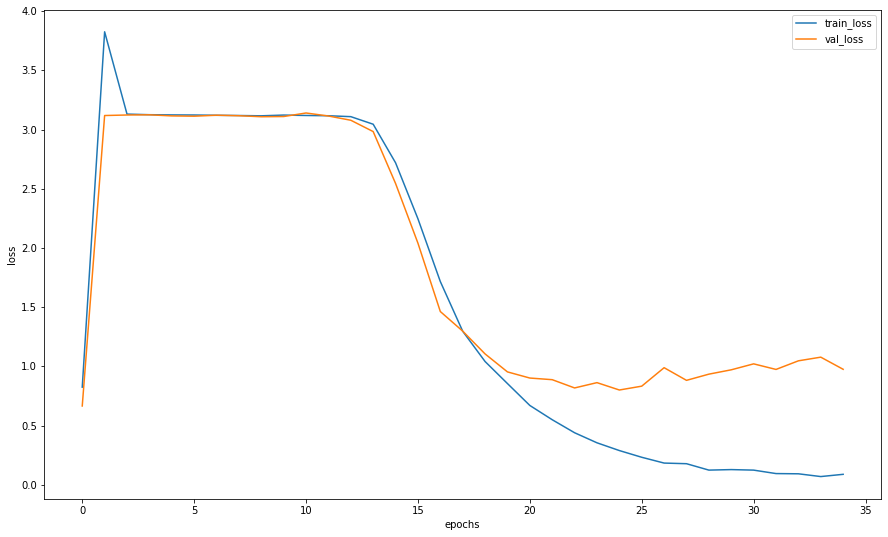

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

ResNet_50 35 epoch


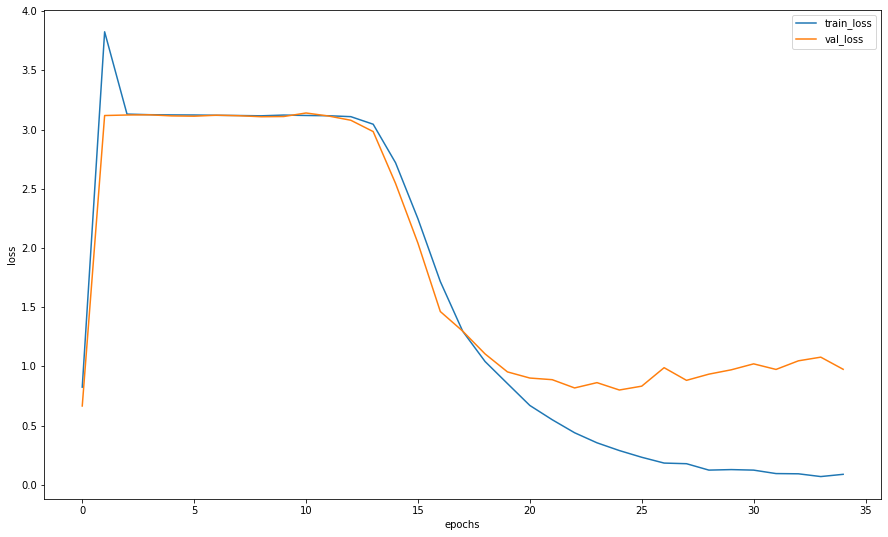

ResNet_34 40 epoch

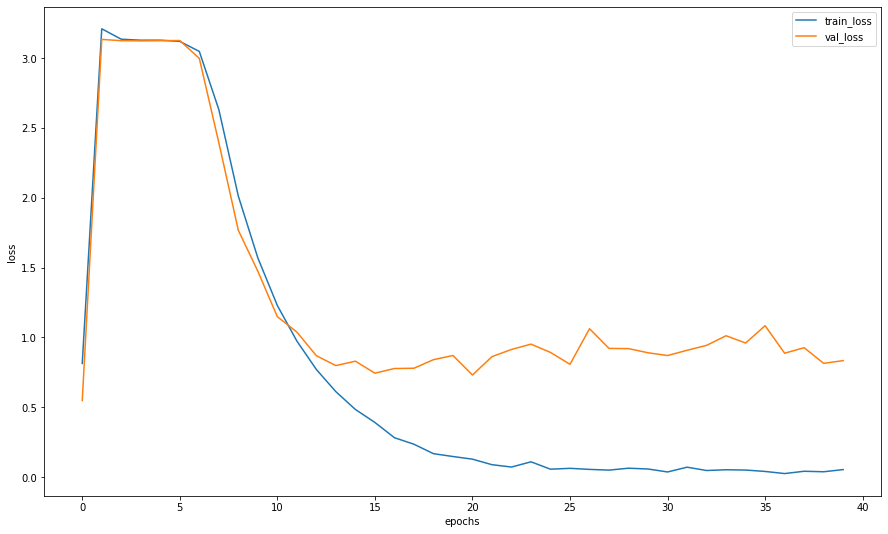

res_net_18
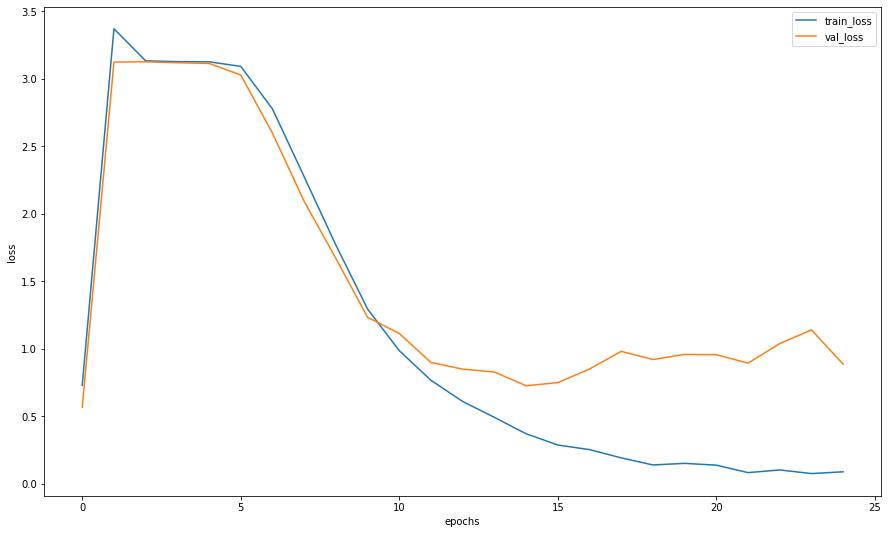

simple_cnn

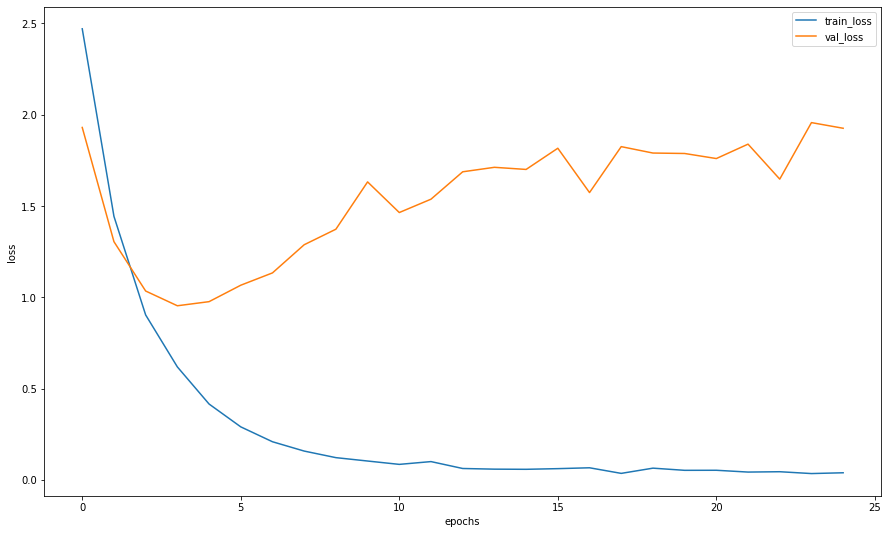![image.png]()

### Ну и что теперь со всем этим делать?

![alt text](https://www.indiewire.com/wp-content/uploads/2014/08/the-simpsons.jpg)

Хорошо бы понять, как сделать сабмит. 
У нас есть сеть и методы eval у нее, которые позволяют перевести сеть в режим предсказания. Стоит понимать, что у нашей модели на последнем слое стоит softmax, которые позволяет получить вектор вероятностей  того, что объект относится к тому или иному классу. Давайте воспользуемся этим.

In [ ]:
def predict_one_sample(model, inputs, device=DEVICE):
    """Предсказание, для одной картинки"""
    with torch.no_grad():
        inputs = inputs.to(device)
        model.eval()
        logit = model(inputs).cpu()
        probs = torch.nn.functional.softmax(logit, dim=-1).numpy()
    return probs

In [ ]:
random_characters = int(np.random.uniform(0,1000))
ex_img, true_label = val_dataset[random_characters]

probs_im = predict_one_sample(ResNet_50, ex_img.unsqueeze(0))#res_net simple_cnn

In [ ]:
idxs = list(map(int, np.random.uniform(0,1000, 20)))
imgs = [val_dataset[id][0].unsqueeze(0) for id in idxs]

probs_ims = predict(ResNet_50, imgs)##

In [ ]:
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

In [ ]:
y_pred = np.argmax(probs_ims,-1)

actual_labels = [val_dataset[id][1] for id in idxs]


preds_class = [label_encoder.classes_[i] for i in y_pred]

Обратите внимание, что метрика, которую необходимо оптимизировать в конкурсе --- f1-score. Вычислим целевую метрику на валидационной выборке.

In [ ]:
#from sklearn.metrics import f1_score

#f1_score(actual_labels, preds_class)

from sklearn.metrics import f1_score

f1_score(actual_labels, y_pred, average='micro')


0.8000000000000002

Сделаем классную визуализацию,  чтобы посмотреть насколько сеть уверена в своих ответах. Можете исспользовать это, чтобы отлаживать правильность вывода.

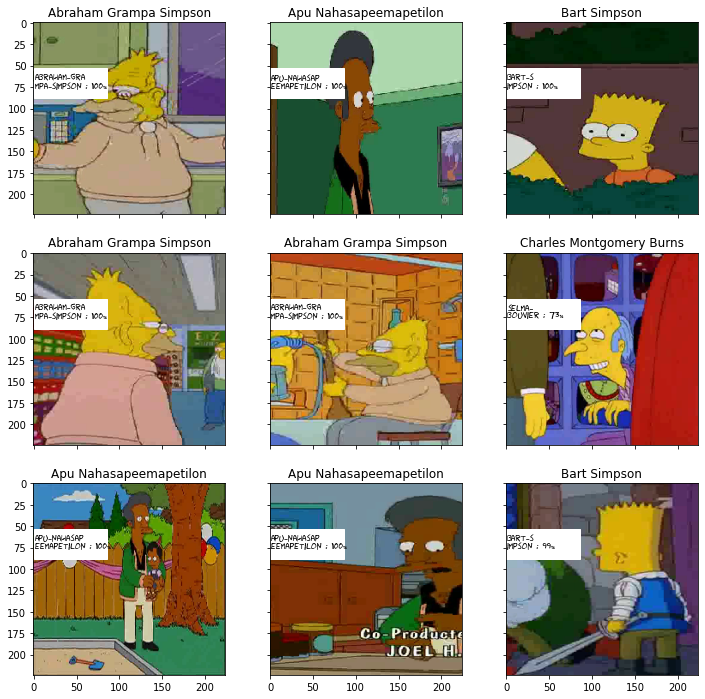

In [ ]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(12, 12), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    
    

    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)
    
    actual_text = "Actual : {}".format(img_label)
            
    fig_x.add_patch(patches.Rectangle((0, 53),86,35,color='white'))
    font0 = FontProperties()
    font = font0.copy()
    font.set_family("fantasy")
    prob_pred = predict_one_sample(ResNet_50, im_val.unsqueeze(0))# res_net simple_cnn
    predicted_proba = np.max(prob_pred)*100
    y_pred = np.argmax(prob_pred)
    
    predicted_label = label_encoder.classes_[y_pred]
    predicted_label = predicted_label[:len(predicted_label)//2] + '\n' + predicted_label[len(predicted_label)//2:]
    predicted_text = "{} : {:.0f}%".format(predicted_label,predicted_proba)
            
    fig_x.text(1, 59, predicted_text , horizontalalignment='left', fontproperties=font,
                    verticalalignment='top',fontsize=8, color='black',fontweight='bold')

Попробуйте найти те классы, которые сеть не смогла расспознать. Изучите данную проблему, это понадобится в дальнейшем.

### Submit на Kaggle

![alt text](https://i.redd.it/nuaphfioz0211.jpg)

In [ ]:
test_dataset = SimpsonsDataset(test_files, mode="test")
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=64)
probs = predict(ResNet_50, test_loader) #res_net simple_cnn


preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))
test_filenames = [path.name for path in test_dataset.files]


In [ ]:
! ls 

gdrive	label_encoder.pkl  sample_data


In [ ]:
import pandas as pd
my_submit = pd.read_csv("/content/gdrive/MyDrive/journey-springfield/sample_submission.csv")
my_submit = pd.DataFrame({'Id': test_filenames, 'Expected': preds})
my_submit.head()

,Id,Expected
0,img0.jpg,nelson_muntz
1,img1.jpg,bart_simpson
2,img10.jpg,ned_flanders
3,img100.jpg,chief_wiggum
4,img101.jpg,apu_nahasapeemapetilon


In [ ]:
# TODO : сделайте сабмит (это важно, если Вы не справляетесь, но дошли до этой ячейки, то сообщите в чат и Вам помогут)

In [ ]:
my_submit.to_csv('/content/gdrive/MyDrive/journey-springfield/ResNet_50_cnn.csv', index=False)


In [ ]:
my_submit.head()

,Id,Expected
0,img0.jpg,nelson_muntz
1,img1.jpg,bart_simpson
2,img10.jpg,ned_flanders
3,img100.jpg,chief_wiggum
4,img101.jpg,apu_nahasapeemapetilon


In [ ]:
import pandas as pd
mysubmit = pd.DataFrame(columns=['Id'])
test_filenames = [path.name for path in test_dataset.files]
mysubmit['Id'] = test_filenames
mysubmit[f'Expected'] = preds
my_submit.to_csv('/content/gdrive/MyDrive/journey-springfield/res_net_cnn_v1.csv', index=False)##



## Приключение?

А теперь самое интересное, мы сделали простенькую сверточную сеть и смогли отправить сабмит, но получившийся скор нас явно не устраивает. Надо с этим что-то сделать. 

Несколько срочныйх улучшейни для нашей сети, которые наверняка пришли Вам в голову: 


*   Учим дольше и изменяем гиперпараметры сети
*  learning rate, batch size, нормализация картинки и вот это всё
*   Кто же так строит нейронные сети? А где пулинги и батч нормы? Надо добавлять
*  Ну разве Адам наше все? [adamW](https://www.fast.ai/2018/07/02/adam-weight-decay/) для практика, [статейка для любителей](https://openreview.net/pdf?id=ryQu7f-RZ) (очень хороший анализ), [наши ](https://github.com/MichaelKonobeev/adashift/) эксперименты для заинтересованных.

* Ну разве это deep learning? Вот ResNet и Inception, которые можно зафайнтьюнить под наши данные, вот это я понимаю (можно и обучить в колабе, а можно и [готовые](https://github.com/Cadene/pretrained-models.pytorch) скачать).

* Данных не очень много, можно их аугументировать и  доучититься на новом датасете ( который уже будет состоять из, как  пример аугументации, перевернутых изображений)

* Стоит подумать об ансамблях


Надеюсь, что у Вас получится!

![alt text](https://pbs.twimg.com/profile_images/798904974986113024/adcQiVdV.jpg)
